In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import norm

import warnings 
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [14]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [15]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [17]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: >

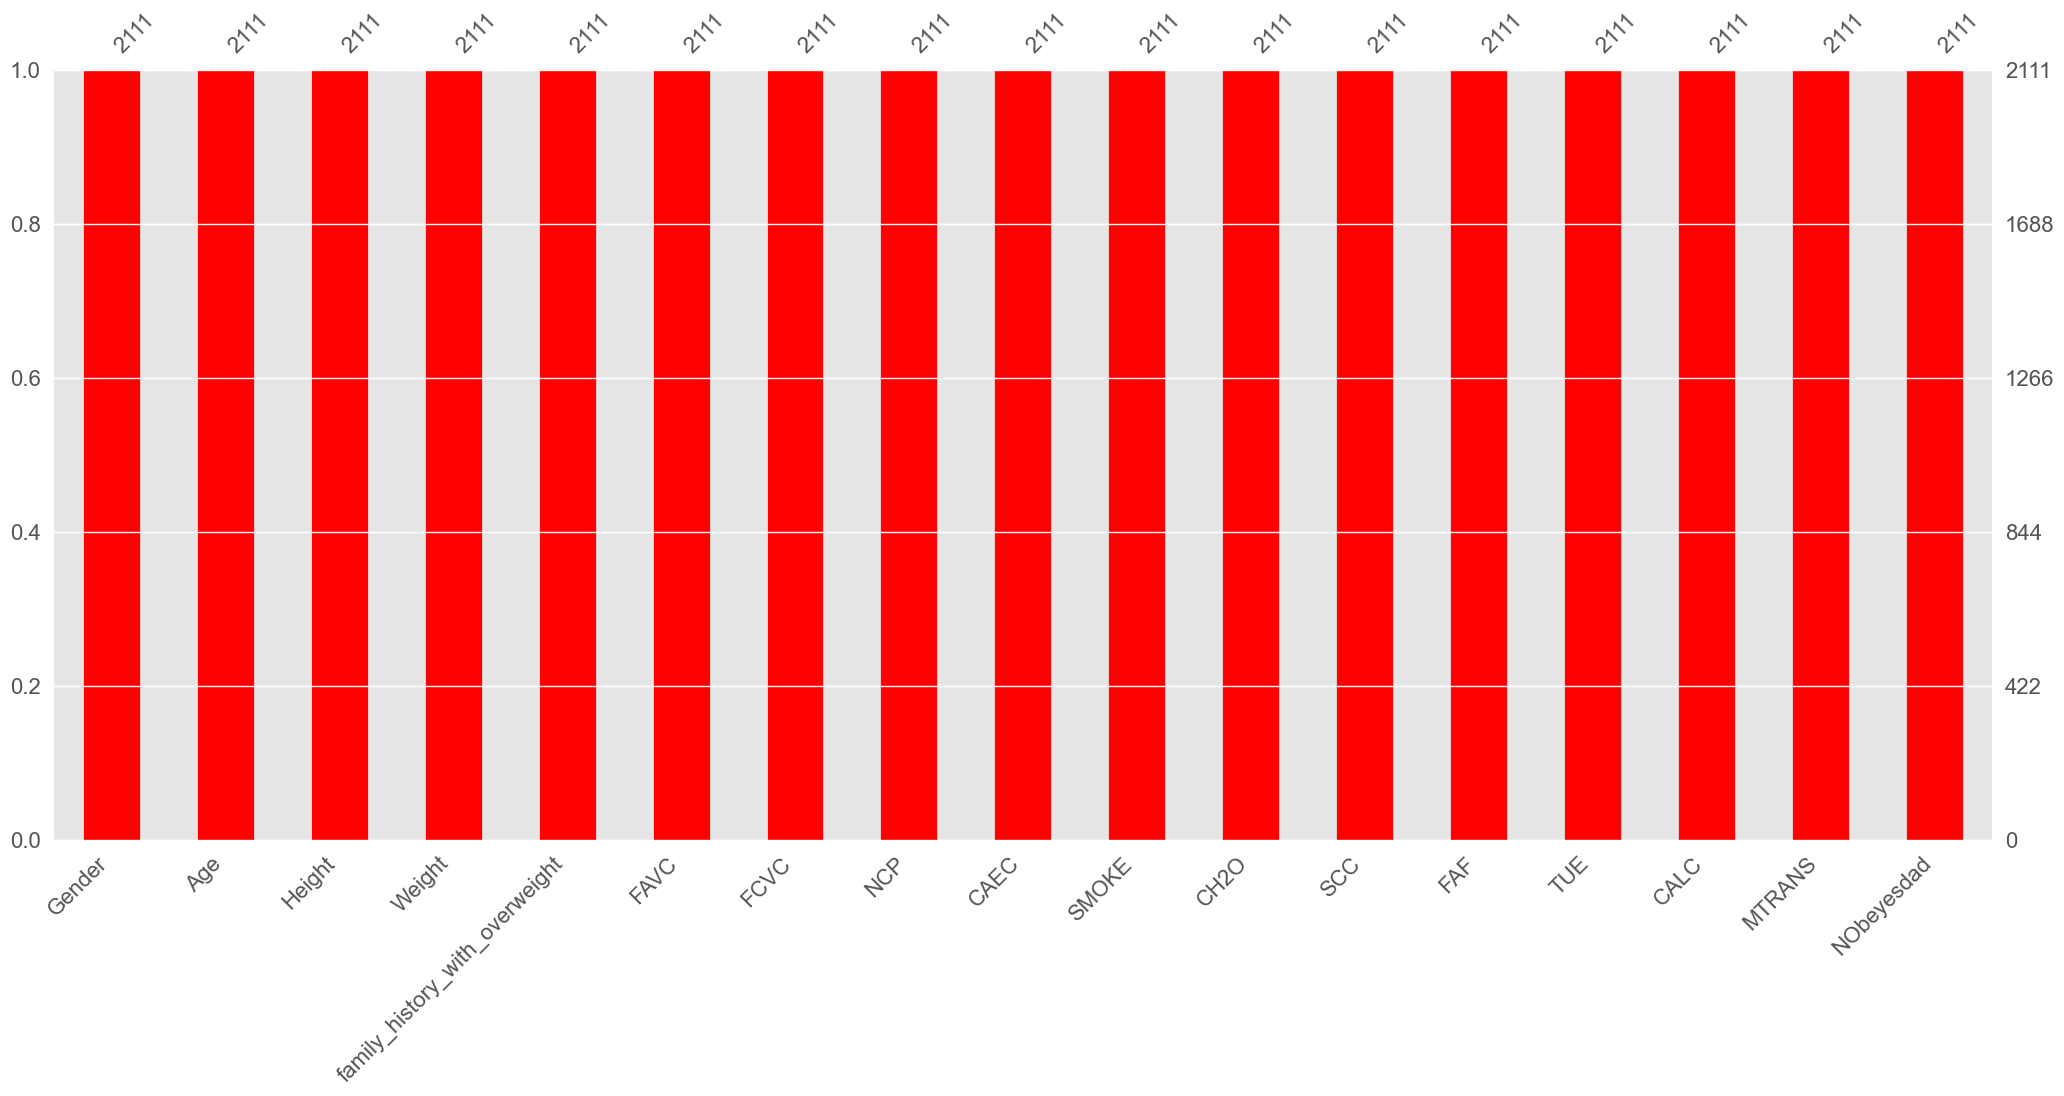

In [18]:
msno.bar(df, color = "red")

In [19]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [20]:
df = df.rename(columns = { 'NObeyesdad':'obes_class', 'family_history_with_overweight':'fam_hist'})

In [21]:
df.obes_class.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [22]:
replace_list = {
    'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5, 'Obesity_Type_III':6
}
df['obes_class'] = df['obes_class'].replace(replace_list)

In [23]:
df

,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obes_class
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,2
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,6


**EDA: Reviewing relationship between some features and target values**

<Axes: xlabel='obes_class', ylabel='Density'>

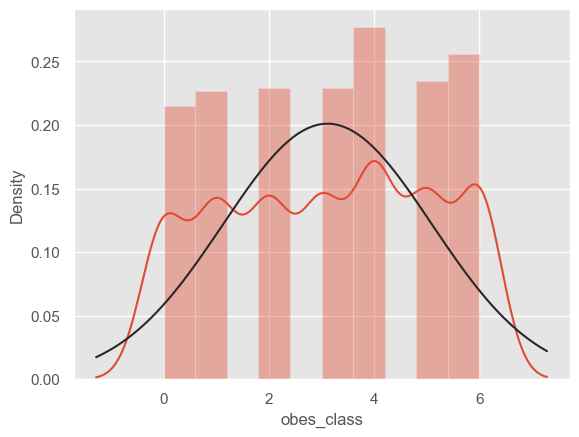

In [24]:
sns.distplot(df['obes_class'], fit = norm )

<Axes: xlabel='obes_class', ylabel='Count'>

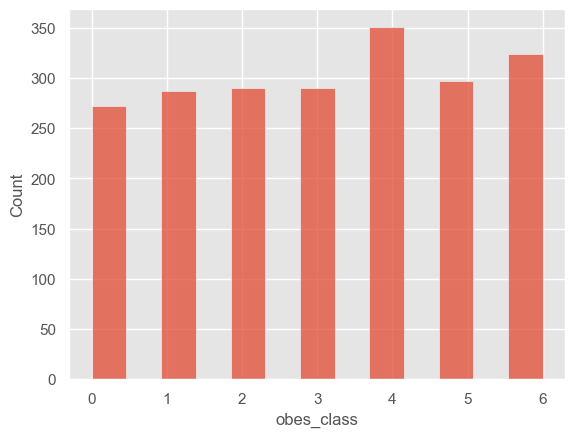

In [25]:
sns.histplot(df['obes_class'])

* **checking on assumption if gender affects the obesity class**

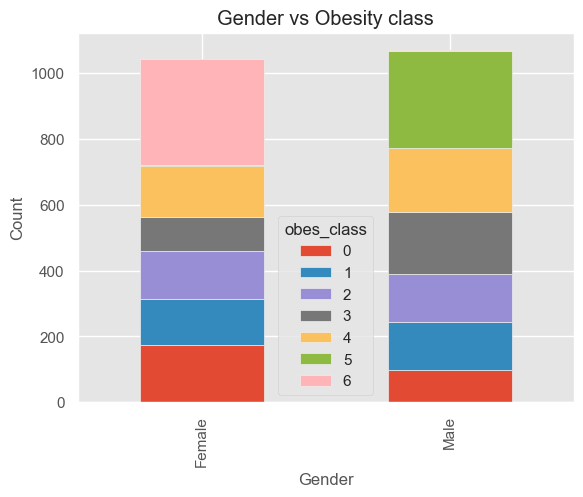

In [26]:
gender_tab = pd.crosstab(df['Gender'], df['obes_class'])
gender_tab.plot(kind = 'bar', stacked = True)
plt.title('Gender vs Obesity class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

the above visualization shows that majority of females are in class 6 (obesity type 3) and majority of males are in class 5 (obesity type 2). Additionally type 3 obesity not seen in male at all. 

* **visualising the effect of age on class obesity**

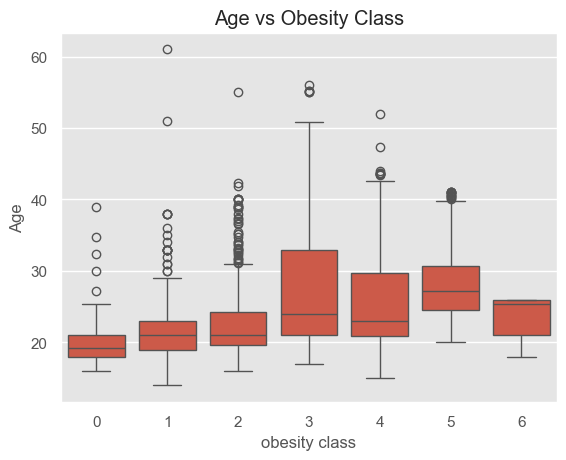

In [27]:
sns.boxplot(data = df, x = 'obes_class', y = 'Age')
plt.title('Age vs Obesity Class')
plt.xlabel('obesity class')



plt.ylabel('Age')
plt.show()

* **visualising how height is associated with obesity class**

Text(0, 0.5, 'Height')

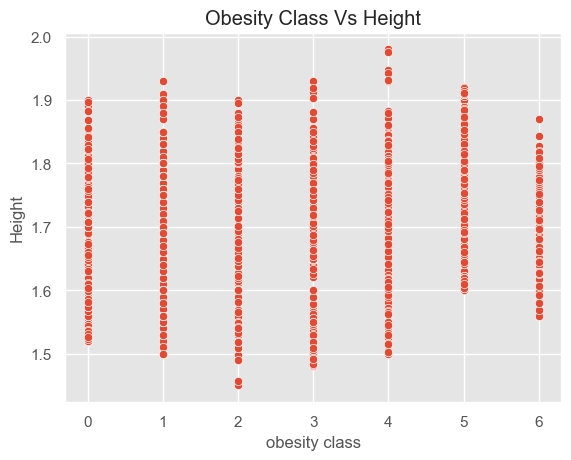

In [28]:
sns.scatterplot(data = df, x ='obes_class', y = 'Height')
plt.title('Obesity Class Vs Height')
plt.xlabel('obesity class')
plt.ylabel('Height')

based on the above given graph we ge the insight that people of smaller height donot have risk of obesity of higher class than the people of larger height.

* **Visualising how the frequency of comsumption of vegetables (FCVC) is related to type of obesity**

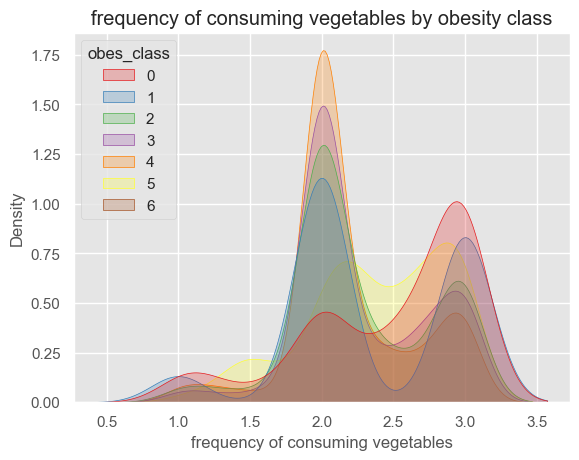

In [29]:
sns.kdeplot(data = df, x = 'FCVC', hue = 'obes_class', fill = True, palette='Set1', common_norm=False)
plt.xlabel('frequency of consuming vegetables')
plt.ylabel('Density')
plt.title('frequency of consuming vegetables by obesity class')
plt.show()

based on above data even with a frequent consumption of vegetables people still risk the chances of being overweight and obese.

* **visualising how number of main meals is linked to obesity level**

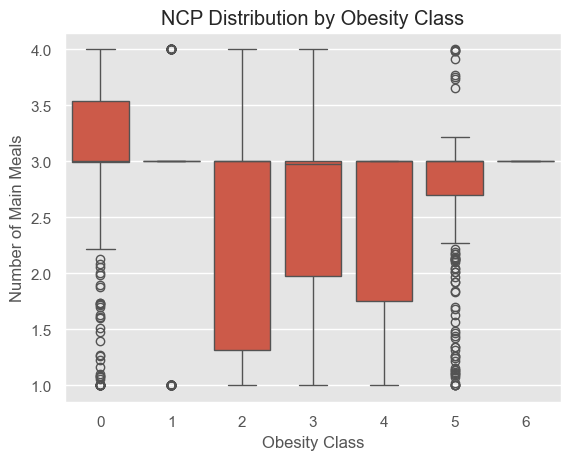

In [30]:
sns.boxplot(x = 'obes_class', y='NCP', data=df)
plt.xlabel('Obesity Class')
plt.ylabel('Number of Main Meals')
plt.title('NCP Distribution by Obesity Class')
plt.show()

 based on the above visualization, it appears that the median number of people who are underweight (class 0) eatcs 3-3.5 meals per day.

* **Visualization density of consumption of water**

<Axes: xlabel='CH2O', ylabel='Count'>

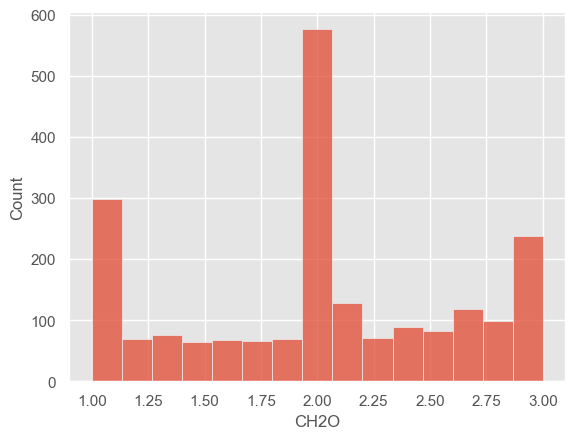

In [31]:
sns.histplot(df['CH2O'])

based on above, the majority of daily water consumption is 2 liters per day.

* **visualization of frequncy of physical activity in relation to obesity class**

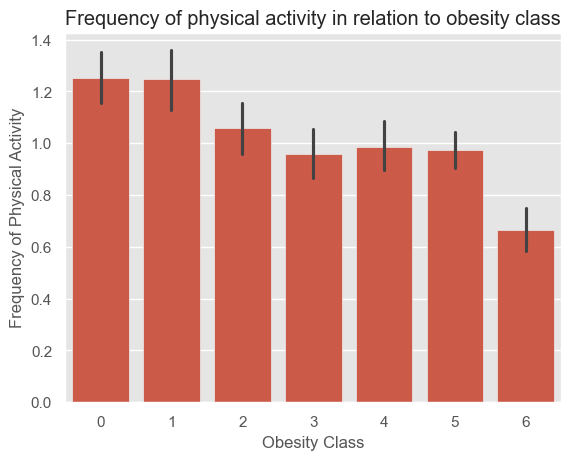

In [32]:
sns.barplot(data = df, x = 'obes_class', y='FAF')
plt.xlabel('Obesity Class')
plt.ylabel('Frequency of Physical Activity')
plt.title('Frequency of physical activity in relation to obesity class')
plt.show()

In [40]:
df1 = pd.get_dummies(df, drop_first = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2111 non-null   float64
 1   Height                        2111 non-null   float64
 2   Weight                        2111 non-null   float64
 3   FCVC                          2111 non-null   float64
 4   NCP                           2111 non-null   float64
 5   CH2O                          2111 non-null   float64
 6   FAF                           2111 non-null   float64
 7   TUE                           2111 non-null   float64
 8   obes_class                    2111 non-null   int64  
 9   Gender_Male                   2111 non-null   bool   
 10  fam_hist_yes                  2111 non-null   bool   
 11  FAVC_yes                      2111 non-null   bool   
 12  CAEC_Frequently               2111 non-null   bool   
 13  CAE

In [44]:
# Convert boolean columns to uint8
bool_columns = df1.select_dtypes(include=['bool']).columns
df1[bool_columns] = df1[bool_columns].astype('uint8')

# Check the updated data types
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2111 non-null   float64
 1   Height                        2111 non-null   float64
 2   Weight                        2111 non-null   float64
 3   FCVC                          2111 non-null   float64
 4   NCP                           2111 non-null   float64
 5   CH2O                          2111 non-null   float64
 6   FAF                           2111 non-null   float64
 7   TUE                           2111 non-null   float64
 8   obes_class                    2111 non-null   int64  
 9   Gender_Male                   2111 non-null   uint8  
 10  fam_hist_yes                  2111 non-null   uint8  
 11  FAVC_yes                      2111 non-null   uint8  
 12  CAEC_Frequently               2111 non-null   uint8  
 13  CAE

In [45]:
df1

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obes_class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,2,1,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,3,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,6,0,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,6,0,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,6,0,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,6,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
df1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obes_class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,3.112269,0.505921,...,0.024159,0.020843,0.045476,0.033160,0.663667,0.302700,0.003316,0.005211,0.748460,0.026528
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,1.985062,0.500083,...,0.153580,0.142893,0.208395,0.179096,0.472566,0.459535,0.057502,0.072015,0.434001,0.160737
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df1.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obes_class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.282913,0.048394,...,-0.061795,0.091987,-0.116283,0.082566,-0.012483,-0.018803,0.003652,0.020286,-0.554448,-0.063064
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.133565,0.618466,...,-0.095625,0.055499,-0.133753,0.045518,0.107070,-0.127828,0.028996,-0.010471,-0.089684,0.036951
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.913251,0.161668,...,-0.106260,0.025746,-0.201906,-0.041778,0.259599,-0.249828,-0.021745,-0.037300,0.059332,-0.100805
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.227759,-0.274505,...,-0.103902,0.014320,0.071852,-0.018655,0.082804,-0.077072,-0.029843,-0.007512,0.057966,0.013991
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.026690,0.067600,...,-0.146328,0.007811,-0.015624,-0.019126,0.099280,-0.092407,0.023312,0.003875,-0.056849,0.006502
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.133008,0.107930,...,0.159008,-0.031995,0.008036,0.049442,0.062251,-0.083272,0.026139,-0.000946,0.037504,0.008307
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,-0.199901,0.189607,...,0.024298,0.011216,0.074221,0.054739,-0.136138,0.118678,0.067129,-0.016351,-0.048751,0.108927
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.107991,0.017269,...,-0.110870,0.017613,-0.010928,0.060964,-0.102871,0.079755,-0.021725,-0.067402,0.143597,0.073404
obes_class,0.282913,0.133565,0.913251,0.227759,0.026690,0.133008,-0.199901,-0.107991,1.000000,-0.031464,...,-0.103730,0.003442,-0.194508,-0.059801,0.214067,-0.195734,-0.036479,-0.037247,0.085606,-0.138564
Gender_Male,0.048394,0.618466,0.161668,-0.274505,0.067600,0.107930,0.189607,0.017269,-0.031464,1.000000,...,0.062930,0.044698,-0.102633,0.034848,-0.037694,0.024163,0.057001,0.045203,-0.160184,0.039317


<Axes: >

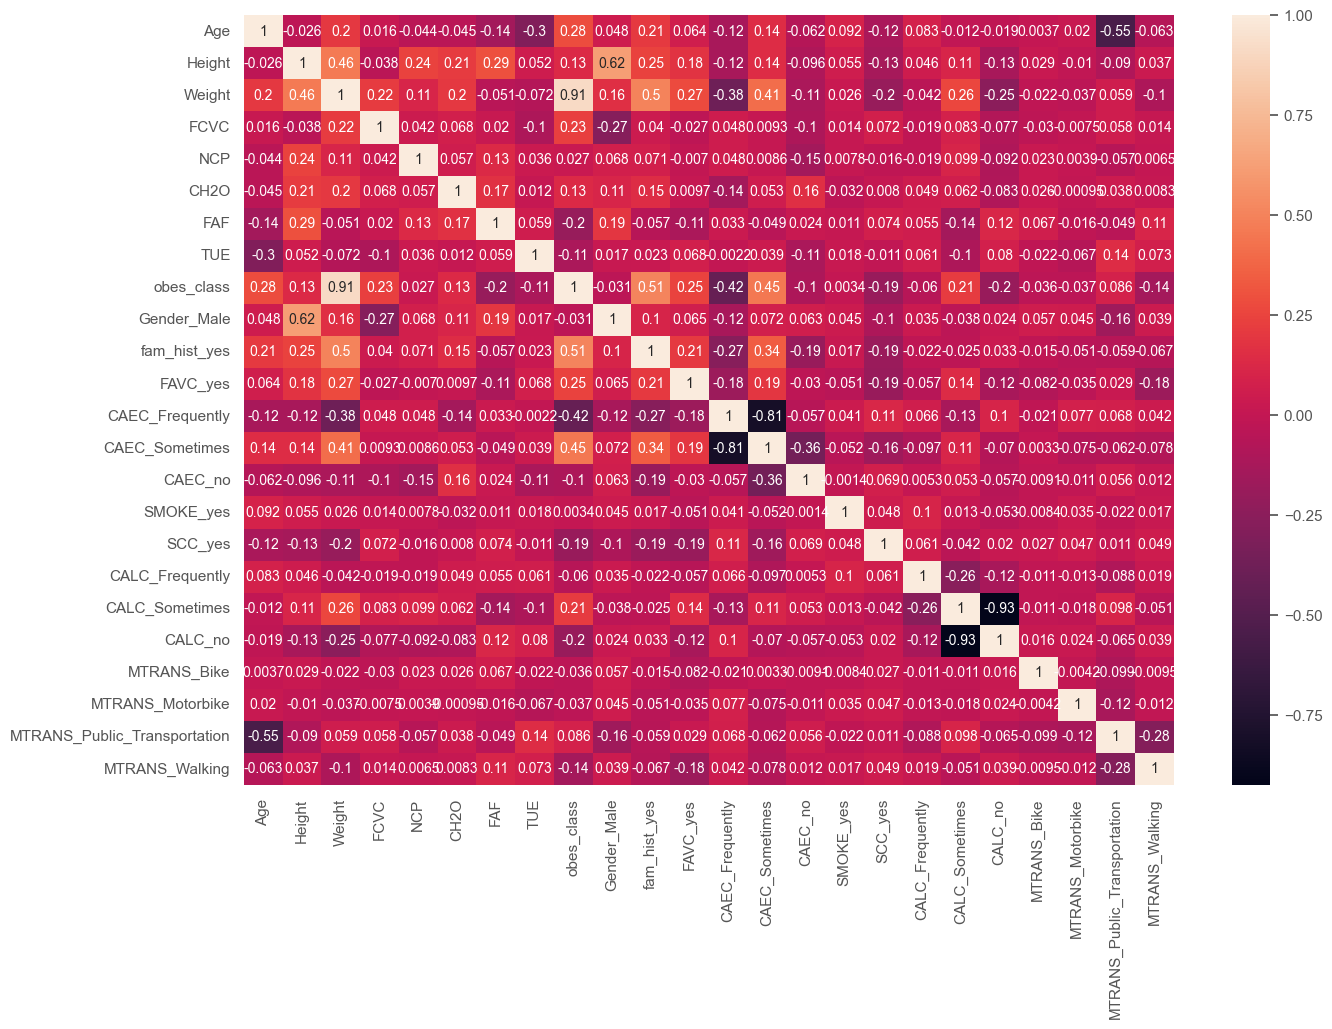

In [48]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), cbar = True, annot = True)

In [49]:
df1

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obes_class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,2,1,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,3,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,6,0,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,6,0,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,6,0,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,6,0,...,0,0,0,0,1,0,0,0,1,0


**Prepare Out-of-sample Predictions by taking last 20 lines of sample data**

In [50]:
oos_data = df1.iloc[0:20]
oos_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obes_class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,1,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,1,...,0,0,0,0,1,0,0,0,1,0
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,0
6,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
7,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0,1,1,...,0,0,0,0,1,0,0,0,1,0
8,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
9,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [51]:
oos_data.obes_class.unique()

array([1, 2, 3, 4], dtype=int64)

**Prepare the dataset for model processing**

In [53]:
df2 = df1.drop(df1.index[0:20])
df2.info()
##to make sure everything is in numeric data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 20 to 2110
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2091 non-null   float64
 1   Height                        2091 non-null   float64
 2   Weight                        2091 non-null   float64
 3   FCVC                          2091 non-null   float64
 4   NCP                           2091 non-null   float64
 5   CH2O                          2091 non-null   float64
 6   FAF                           2091 non-null   float64
 7   TUE                           2091 non-null   float64
 8   obes_class                    2091 non-null   int64  
 9   Gender_Male                   2091 non-null   uint8  
 10  fam_hist_yes                  2091 non-null   uint8  
 11  FAVC_yes                      2091 non-null   uint8  
 12  CAEC_Frequently               2091 non-null   uint8  
 13  CA

 **Data preprocessing by preparing the features and target variable**

In [56]:
from sklearn.model_selection import train_test_split

X = df2.drop('obes_class', axis = 1)
y = df2.obes_class

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

**Creating pipeline with various models**

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(estimator = RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [58]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [59]:
X_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,fam_hist_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1459,22.336216,1.785718,105.055686,2.253707,3.000000,2.524432,0.582160,0.175694,1,1,...,0,0,0,0,1,0,0,0,1,0
1915,26.000000,1.616975,104.846218,3.000000,3.000000,2.653563,0.000000,0.554150,0,1,...,0,0,0,0,1,0,0,0,1,0
1001,31.333798,1.835381,91.059595,2.000000,3.000000,1.184230,0.155579,0.453404,1,1,...,0,0,0,0,1,0,0,0,1,0
1587,25.478662,1.858265,117.574570,2.028571,3.000000,2.530428,1.312570,0.066805,1,1,...,0,0,0,0,1,0,0,0,1,0
1141,22.980957,1.700216,80.473587,2.000000,2.815255,1.622214,0.463891,1.462664,0,1,...,0,0,0,0,0,1,0,0,1,0


In [60]:
print(len(df2.columns))

24


In [61]:
print(len(sel.get_support()))

23


In [62]:
#keep only true columns
selected_features = X.columns[sel.get_support()]
selected_data = X[selected_features]

In [63]:
selected_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male
20,22.000000,1.650000,80.000000,2.0,3.0,2.000000,3.000000,2.000000,1
21,52.000000,1.690000,87.000000,3.0,1.0,2.000000,0.000000,0.000000,0
22,22.000000,1.650000,60.000000,3.0,3.0,2.000000,1.000000,0.000000,0
23,22.000000,1.600000,82.000000,1.0,1.0,2.000000,0.000000,2.000000,0
24,21.000000,1.850000,68.000000,2.0,3.0,2.000000,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0


In [65]:
#import train test data again with selected data

X_new = selected_data
y = df2.obes_class

X_new_train, X_new_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2, random_state = 0)

* create pipeline to try various models

In [66]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

names = ["Logistic Regression", "KNN", "SVC (Linear)", "SVC (RBF)", "Decision Tree", 
         "Naive Bayes", "Random Forest Classifier", "AdaBoost Classifier", 
         "XGBoost Classifier", "CatBoost Classifier"]

scores = []

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='linear', C=0.1),
    SVC(kernel='rbf', gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_leaf_nodes=16),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=42),
    XGBClassifier(random_state=42),
    CatBoostClassifier(iterations = 100, learning_rate = 0.1, verbose = False, random_state = 42)
]

for clf in classifiers:
    pipe = Pipeline([("scaler", StandardScaler()), ("classifier", clf)])
    pipe.fit(X_new_train, y_train)
    score = pipe.score(X_new_test, y_test)
    scores.append(score)
    print(f"{clf}: Model score: {score:.3f}")
    print("\n----------------------------------------------")

score_df = pd.DataFrame(zip(names, scores), columns=['Classifier', 'Accuracy'])

LogisticRegression(): Model score: 0.864

----------------------------------------------
KNeighborsClassifier(n_neighbors=3): Model score: 0.809

----------------------------------------------
SVC(C=0.1, kernel='linear'): Model score: 0.852

----------------------------------------------
SVC(C=1, gamma=2): Model score: 0.845

----------------------------------------------
DecisionTreeClassifier(max_depth=5): Model score: 0.797

----------------------------------------------
GaussianNB(): Model score: 0.649

----------------------------------------------
RandomForestClassifier(max_depth=5, max_leaf_nodes=16): Model score: 0.857

----------------------------------------------
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   random_state=42): Model score: 0.979

----------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_b

In [67]:
print(score_df)

                 Classifier  Accuracy
0       Logistic Regression  0.863962
1                       KNN  0.809069
2              SVC (Linear)  0.852029
3                 SVC (RBF)  0.844869
4             Decision Tree  0.797136
5               Naive Bayes  0.649165
6  Random Forest Classifier  0.856802
7       AdaBoost Classifier  0.978520
8        XGBoost Classifier  0.978520
9       CatBoost Classifier  0.957041


**Finalise the best model to perform**

In [68]:
score_df.sort_values(by=('Accuracy'), ascending = (False))

,Classifier,Accuracy
7,AdaBoost Classifier,0.978520
8,XGBoost Classifier,0.978520
9,CatBoost Classifier,0.957041
0,Logistic Regression,0.863962
6,Random Forest Classifier,0.856802
2,SVC (Linear),0.852029
3,SVC (RBF),0.844869
1,KNN,0.809069
4,Decision Tree,0.797136
5,Naive Bayes,0.649165


**The best model to perform concluded to be AdaBoost Classifier with accuracy score of 0.978520**

In [69]:
Best_pipe = Pipeline([('Scaler', StandardScaler()), 
                      ('Classifier', AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5), random_state = 42))])
Best_pipe.fit(X_new_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                    random_state=42))])

In [70]:
prediction = Best_pipe.predict(X_new_test)
print(prediction)

[3 3 4 0 2 3 6 6 2 6 2 0 5 4 1 2 6 5 4 6 1 5 6 3 1 2 1 2 5 2 5 3 1 0 5 5 3
 5 1 1 0 5 6 6 4 1 1 3 6 0 5 1 3 0 4 4 2 4 1 1 1 3 0 3 2 2 0 2 3 6 3 4 1 0
 3 4 0 3 4 1 1 6 2 6 3 5 2 1 0 4 0 2 4 2 2 4 6 2 4 1 4 3 0 6 6 4 5 3 1 5 4
 3 3 1 2 5 2 2 5 5 2 2 3 4 5 4 1 6 6 6 3 0 1 4 2 3 2 6 2 5 4 1 4 6 4 2 3 3
 3 6 0 2 6 1 6 3 0 5 3 0 1 6 1 3 2 1 3 2 2 3 1 0 3 3 2 4 1 0 3 6 1 6 6 0 0
 6 4 5 0 2 6 6 4 5 0 3 5 6 0 4 1 4 1 0 5 0 0 3 6 6 6 1 4 1 3 5 1 4 4 1 1 6
 4 6 4 4 0 5 6 1 3 1 4 4 5 6 1 4 0 2 1 4 0 6 3 6 4 4 1 5 6 2 0 4 5 3 2 4 0
 3 0 2 2 6 2 6 4 2 5 5 6 0 4 1 5 1 2 1 0 2 6 5 6 1 0 6 5 5 6 3 2 6 1 1 2 3
 6 0 4 0 3 3 2 3 4 4 4 2 3 1 6 0 5 5 4 1 1 3 0 1 1 4 2 2 0 6 5 5 2 4 2 6 3
 1 0 6 5 6 1 4 1 0 4 5 4 4 0 0 4 2 4 0 5 4 3 5 5 2 1 4 1 1 4 2 3 4 2 3 6 0
 2 0 4 4 6 4 0 1 0 3 6 6 3 6 4 6 4 3 6 1 2 2 0 5 3 5 2 1 0 3 5 6 6 1 2 1 6
 2 3 2 2 6 5 0 3 1 0 3 3]


In [71]:
prediction_df = pd.DataFrame(prediction, columns=['Predicted_Class'])

In [72]:
prediction_df_result = selected_data
prediction_df_result['Predicted_Class']=prediction_df

prediction_df_result

In [75]:
prediction_df_result.to_csv('obesity_prediction.csv', index = False)

* **Creating a confusion matrix**

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[54  0  0  0  0  0  0]
 [ 0 64  2  0  0  0  0]
 [ 0  1 55  1  0  0  0]
 [ 0  0  4 59  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  0  0  0  1 47  0]
 [ 0  0  0  0  0  0 66]]


 generating a heatmap for above matrix :

<Axes: xlabel='Predicted', ylabel='Actual'>

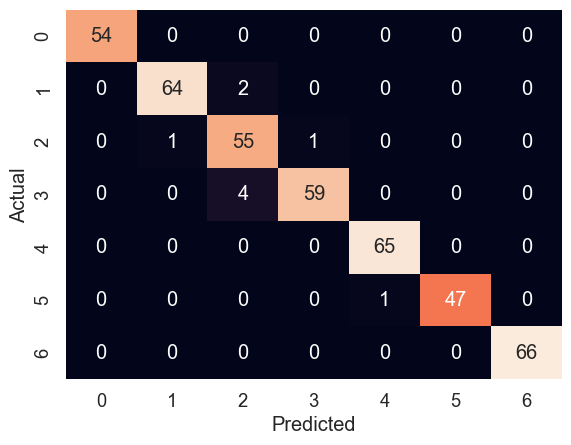

In [80]:
df_cm = pd.DataFrame(cm, columns = np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.set(font_scale = 1.2)
sns.heatmap(df_cm, annot = True, cbar = False)

* **Classification Report**

In [81]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      0.97      0.98        66
           2       0.90      0.96      0.93        57
           3       0.98      0.94      0.96        63
           4       0.98      1.00      0.99        65
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        66

    accuracy                           0.98       419
   macro avg       0.98      0.98      0.98       419
weighted avg       0.98      0.98      0.98       419



**Performing Classification Analysis**

In [82]:
df2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obes_class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
20,22.000000,1.650000,80.000000,2.0,3.0,2.000000,3.000000,2.000000,3,1,...,0,0,0,0,0,1,0,0,0,1
21,52.000000,1.690000,87.000000,3.0,1.0,2.000000,0.000000,0.000000,4,0,...,0,1,0,0,0,1,0,0,0,0
22,22.000000,1.650000,60.000000,3.0,3.0,2.000000,1.000000,0.000000,1,0,...,0,0,0,0,1,0,0,0,0,0
23,22.000000,1.600000,82.000000,1.0,1.0,2.000000,0.000000,2.000000,4,0,...,0,0,0,0,1,0,0,0,1,0
24,21.000000,1.850000,68.000000,2.0,3.0,2.000000,0.000000,1.000000,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,6,0,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,6,0,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,6,0,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,6,0,...,0,0,0,0,1,0,0,0,1,0


data from selected_data is used to perfom clustering analysis

In [83]:
selected_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,Predicted_Class
20,22.000000,1.650000,80.000000,2.0,3.0,2.000000,3.000000,2.000000,1,1.0
21,52.000000,1.690000,87.000000,3.0,1.0,2.000000,0.000000,0.000000,0,5.0
22,22.000000,1.650000,60.000000,3.0,3.0,2.000000,1.000000,0.000000,0,6.0
23,22.000000,1.600000,82.000000,1.0,1.0,2.000000,0.000000,2.000000,0,3.0
24,21.000000,1.850000,68.000000,2.0,3.0,2.000000,0.000000,1.000000,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,NaN
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,NaN
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,NaN
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,NaN


In [86]:
df_cl = df2[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','Gender_Male', 'obes_class']]
scaler = StandardScaler()
obes_scaled = scaler.fit_transform(df_cl['obes_class'].values.reshape(-1,1))
df_cl.obes_class = obes_scaled

In [87]:
df_cl.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,obes_class
20,22.0,1.65,80.0,2.0,3.0,2.0,3.0,2.0,1,-0.062080
21,52.0,1.69,87.0,3.0,1.0,2.0,0.0,0.0,0,0.441053
22,22.0,1.65,60.0,3.0,3.0,2.0,1.0,0.0,0,-1.068345
23,22.0,1.60,82.0,1.0,1.0,2.0,0.0,2.0,0,0.441053
24,21.0,1.85,68.0,2.0,3.0,2.0,0.0,1.0,1,-1.068345


* **K means Clustering using Elbow Method**

In [93]:
from sklearn.cluster import KMeans

def calculate_wcss(data):
    wcss = []
    for n in range (2,15):
        kmeans = KMeans(n_clusters = n, random_state = 0)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

In [94]:
wcss = calculate_wcss(df_cl)

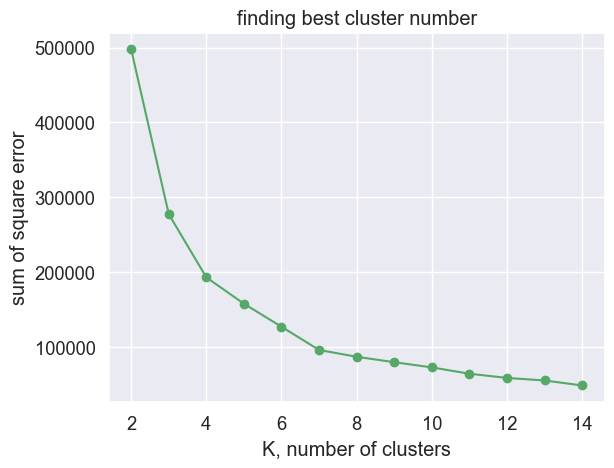

In [97]:
#plot the elbow

plt.plot(range(2,15), wcss, '-go')
plt.xlabel('K, number of clusters')
plt.ylabel('sum of square error')
plt.title('finding best cluster number')
plt.show()

In [109]:
from kneed import KneeLocator
knee = KneeLocator(range(2,15), wcss, curve = 'convex', direction = 'decreasing')
knee.elbow

4

In [116]:
#running kmeans to optimal number of clusters

kmeans = KMeans(n_clusters = 4)
km_cl = kmeans.fit_predict(df_cl)
km_cl

array([3, 3, 1, ..., 2, 2, 2])

In [117]:
from sklearn.cluster import AgglomerativeClustering

hc_clustering = AgglomerativeClustering(n_clusters =4)
hc_cl = hc_clustering.fit_predict(df_cl)
print(hc_cl)

[2 2 1 ... 0 0 0]


In [118]:
from sklearn.cluster import Birch
B_clustering  = Birch(n_clusters = 4)
B_cl = B_clustering.fit_predict(df_cl)
print(B_cl)

[2 2 0 ... 3 3 3]


Evaluating clustering performance :

In [128]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
cl_methods = ['kmeans', 'agglo', 'brc']
sh_result = []
ch_result = []
db_result = []
#obtaining cluters
cl_clusters = [km_cl, hc_cl, B_cl]


In [129]:
#calculate silhouette_score
for cl in cl_clusters:
    sh_score = silhouette_score(df_cl,cl)
    sh_result.append(sh_score)

In [130]:
#calculate calinski_harabasz_score
for cl in cl_clusters:
    ch_score = calinski_harabasz_score(df_cl, cl)
    ch_result.append(ch_score)

In [131]:
#calculate davies_bouldin_score
for cl in cl_clusters:
    db_score = davies_bouldin_score(df_cl, cl)
    db_result.append(db_score)

In [132]:
result = pd.DataFrame(zip(cl_methods, sh_result, ch_result, db_result),
                      columns = ['clustering method', 'silhouette score', 'calinski harabasz score', 'davies bouldin score'])


In [133]:
result

,clustering method,silhouette score,calinski harabasz score,davies bouldin score
0,kmeans,0.477448,4819.290581,0.695254
1,agglo,0.401502,3952.421169,0.848000
2,brc,0.438181,3916.699954,0.699418


result:

* silhouette score: lower is better
* calinski harabaz: lower is better
* davies bouldin: higher is better

in conclusion, Kmeans offers the best performance for this data based on the thre metrics used. It delivers well-seperated, distinct clusters with low intra-cluster variance and high inter-cluster variance. 

When PCA is used, K-means produces bettter result than others

In [134]:
from sklearn.decomposition import PCA
X = df_cl.values
X_kmeans = KMeans(n_clusters = 4, random_state = 42)
X_labels = X_kmeans.fit_predict(X)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [135]:
X_pca

array([[ -6.82731523,  -2.02929428],
       [  1.73425135,  27.67611858],
       [-26.81427232,  -0.90584509],
       ...,
       [ 46.84206379,  -4.22794885],
       [ 46.59955922,  -2.37619602],
       [ 46.68919521,  -3.08009935]])

In [136]:
X_labels

array([0, 0, 2, ..., 3, 3, 3])

In [138]:
pca_df = pd.DataFrame(X_pca, columns = ['component_1', 'component_2'])
pca_df['predicted_cluster'] = X_labels
print(pca_df)

      component_1  component_2  predicted_cluster
0       -6.827315    -2.029294                  0
1        1.734251    27.676119                  0
2      -26.814272    -0.905845                  2
3       -4.822734    -2.049480                  0
4      -18.883125    -2.328274                  2
...           ...          ...                ...
2086    44.483093    -5.661961                  3
2087    46.867487    -4.767497                  3
2088    46.842064    -4.227949                  3
2089    46.599559    -2.376196                  3
2090    46.689195    -3.080099                  3

[2091 rows x 3 columns]


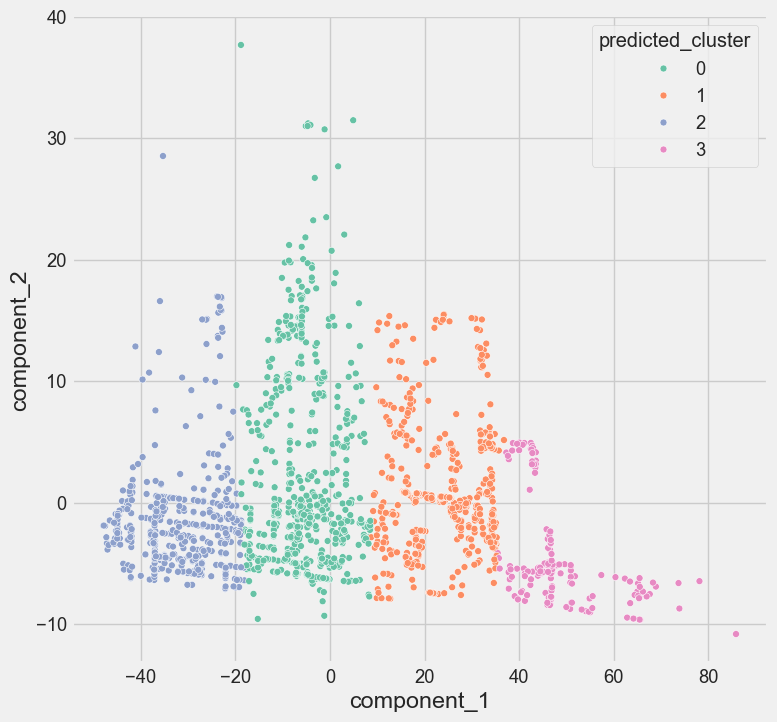

In [140]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
scatter = sns.scatterplot(
    data = pca_df,
    x = 'component_1',
    y = 'component_2',
    hue='predicted_cluster',
    s=25,
    palette = 'Set2'
)

**Performing Out-Of-Sample Prediction**

In [141]:
oos_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,obes_class,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,2,1,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,3,1,...,0,0,0,0,1,0,0,0,1,0
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,0
6,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
7,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0,1,1,...,0,0,0,0,1,0,0,0,1,0
8,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
9,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0,1,1,...,0,0,0,0,0,1,0,0,1,0


In [144]:
#import to train test split

X1 = oos_data[selected_features]
y1 = oos_data.obes_class

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [145]:
oos_pipe = Pipeline([('Scaler', StandardScaler()), 
                      ('Classifier', AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5), random_state = 42))])
oos_pipe.fit(X_train1, y_train1)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                    random_state=42))])

In [146]:
oos_prediction = oos_pipe.predict(X_test1)
print(oos_prediction)

[1 2 1 1]


In [148]:
new_cm = confusion_matrix(y_test1, oos_prediction)
print(new_cm)

[[3 0 0]
 [0 0 0]
 [0 1 0]]


In [149]:
from sklearn.metrics import classification_report
classification_report  = classification_report(y_test1, oos_prediction)
print(classification_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.75      0.75      0.75         4



The classification model shows excellent performance for class 1, achieving performance precision, recall and F1-score. However, the model performance is poorfor classes 2 and 4, aas indicated by 0.00 values for precision and recall, and F1-score. This result suggests that model struggle to correctly classify instances from these classes. Additional analysis, model tuning, or more data may be necessary to improve performance for these classes and create more balanced and accurate classifier.